In [1]:
# load features and labels
import keras
#keras.__version__ 2.4.3
import numpy as np

train_features = np.load("saved_train_features_augmented.npy"); # load augmented data features
validation_features = np.load("saved_validation_features.npy");
test_features = np.load("saved_test_features.npy");
train_labels = np.load("saved_train_labels_augmented.npy"); # load augmented data labels
validation_labels = np.load("saved_validation_labels.npy");
test_labels = np.load("saved_test_labels.npy");


In [2]:
# build network and print summary
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(2*2*128, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2*128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(2*2*64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(2*2*32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(2*2*16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.summary()


# add optimizer
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
Total params: 4,327,686
Trainable params: 4,327,686
Non-trainable params: 0
_________________________________________________________________


In [3]:
# train and save model
history = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

model.save('trash-classifier-1-2.h5')

Epoch 1/100
58/58 [==============================] - 5s 86ms/step - loss: 2.7971 - acc: 0.3190 - val_loss: 2.4526 - val_acc: 0.4587
Epoch 2/100
58/58 [==============================] - 5s 83ms/step - loss: 2.2976 - acc: 0.4862 - val_loss: 2.2292 - val_acc: 0.4859
Epoch 3/100
58/58 [==============================] - 5s 85ms/step - loss: 2.0211 - acc: 0.5379 - val_loss: 1.9603 - val_acc: 0.5413
Epoch 4/100
58/58 [==============================] - 5s 89ms/step - loss: 1.7917 - acc: 0.6034 - val_loss: 1.8453 - val_acc: 0.5674
Epoch 5/100
58/58 [==============================] - 5s 87ms/step - loss: 1.6548 - acc: 0.6569 - val_loss: 1.6521 - val_acc: 0.6304
Epoch 6/100
58/58 [==============================] - 5s 88ms/step - loss: 1.4999 - acc: 0.7095 - val_loss: 1.6458 - val_acc: 0.6457
Epoch 7/100
58/58 [==============================] - 5s 89ms/step - loss: 1.3989 - acc: 0.7259 - val_loss: 1.5993 - val_acc: 0.6533
Epoch 8/100
58/58 [==============================] - 5s 95ms/step - loss: 1.

58/58 [==============================] - 6s 100ms/step - loss: 0.3256 - acc: 0.9862 - val_loss: 1.7230 - val_acc: 0.7185
Epoch 63/100
58/58 [==============================] - 6s 102ms/step - loss: 0.3226 - acc: 0.9879 - val_loss: 1.8146 - val_acc: 0.7043
Epoch 64/100
58/58 [==============================] - 6s 101ms/step - loss: 0.3110 - acc: 0.9905 - val_loss: 2.0485 - val_acc: 0.6489
Epoch 65/100
58/58 [==============================] - 5s 94ms/step - loss: 0.3198 - acc: 0.9845 - val_loss: 1.9632 - val_acc: 0.6663
Epoch 66/100
58/58 [==============================] - 6s 95ms/step - loss: 0.3026 - acc: 0.9914 - val_loss: 1.7191 - val_acc: 0.7109
Epoch 67/100
58/58 [==============================] - 6s 102ms/step - loss: 0.3046 - acc: 0.9922 - val_loss: 1.8937 - val_acc: 0.6815
Epoch 68/100
58/58 [==============================] - 6s 96ms/step - loss: 0.3036 - acc: 0.9897 - val_loss: 1.8377 - val_acc: 0.6902
Epoch 69/100
58/58 [==============================] - 5s 91ms/step - loss: 0.3

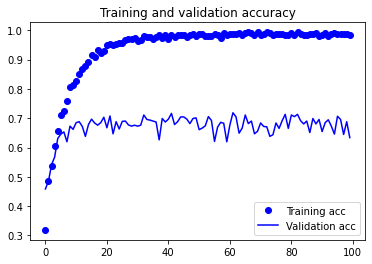

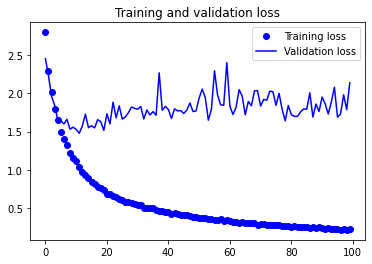

In [4]:
# plot accuracy and loss graphs
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()